In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv('heart_disease_dataset.csv')
df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1


In [40]:
print("Shape:", df.shape)
df.head()

Shape: (1000, 16)


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [41]:
df.isnull().sum()

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df = df.dropna(subset=["Alcohol Intake"])


In [44]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_")
)
df.columns




Index(['age', 'gender', 'cholesterol', 'blood_pressure', 'heart_rate',
       'smoking', 'alcohol_intake', 'exercise_hours', 'family_history',
       'diabetes', 'obesity', 'stress_level', 'blood_sugar',
       'exercise_induced_angina', 'chest_pain_type', 'heart_disease'],
      dtype='object')

In [45]:
binary_cols = ["family_history", "diabetes", "obesity", "exercise_induced_angina"]

for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# Encode Chest Pain Type (categorical)
df["chest_pain_type"] = df["chest_pain_type"].astype("category").cat.codes

# Encode Smoking categorical column
df["smoking"] = df["smoking"].astype("category").cat.codes

# Check result
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_17856\3529515902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({"Yes": 1, "No": 0})
C:\Users\User\AppData\Local\Temp\ipykernel_17856\3529515902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({"Yes": 1, "No": 0})
C:\Users\User\AppData\Local\Temp\ipykernel_17856\3529515902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,Female,228,119,66,0,Heavy,1,0,0,1,8,119,1,1,1
2,53,Male,234,91,67,2,Heavy,3,1,0,1,5,196,1,1,1
6,64,Female,211,105,86,1,Heavy,8,1,1,1,2,120,0,3,1
7,60,Female,208,148,83,2,Moderate,4,0,1,1,2,113,1,0,1
8,37,Female,317,137,66,0,Heavy,3,0,1,1,5,114,0,2,0


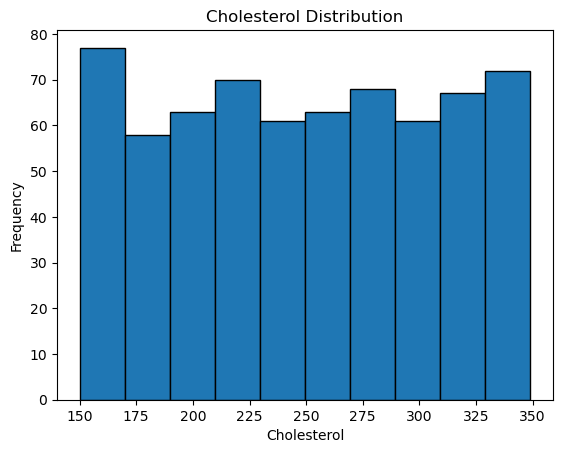

In [46]:
import matplotlib.pyplot as plt

# Histogram for Cholesterol
plt.hist(df["cholesterol"],edgecolor='black')
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.title("Cholesterol Distribution")
plt.show()


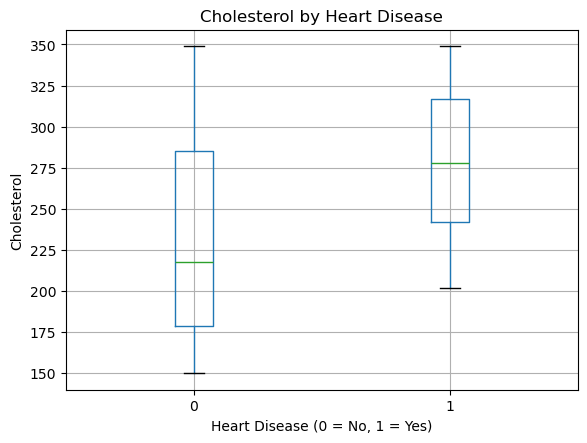

In [47]:
# Boxplot of Cholesterol by Heart Disease
df.boxplot(column="cholesterol", by="heart_disease")
plt.title("Cholesterol by Heart Disease")
plt.suptitle("")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.show()


In [48]:
corr = df.corr(numeric_only=True)

# Print full correlation table
corr


,age,cholesterol,blood_pressure,heart_rate,smoking,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
age,1.000000,0.007875,0.004500,0.050212,-0.042466,-0.007590,0.010722,-0.031614,0.002003,-0.086295,-0.040666,-0.019522,-0.024976,0.648068
cholesterol,0.007875,1.000000,0.027309,-0.010819,0.012810,0.008885,-0.036683,-0.068161,0.015841,0.115721,-0.004058,0.035075,-0.106206,0.369807
blood_pressure,0.004500,0.027309,1.000000,-0.006665,0.015343,-0.011361,-0.000513,-0.065743,-0.043429,0.018005,-0.092608,0.024771,0.006195,0.021624
heart_rate,0.050212,-0.010819,-0.006665,1.000000,-0.039496,-0.006712,0.060931,0.028336,-0.030638,-0.030095,0.023769,0.037545,0.003958,0.040874
smoking,-0.042466,0.012810,0.015343,-0.039496,1.000000,-0.014182,-0.011084,0.055490,-0.033948,0.021193,-0.040360,0.008432,-0.027963,-0.012769
exercise_hours,-0.007590,0.008885,-0.011361,-0.006712,-0.014182,1.000000,0.081056,-0.003190,-0.006643,0.019318,-0.010864,0.068374,0.040182,-0.005986
family_history,0.010722,-0.036683,-0.000513,0.060931,-0.011084,0.081056,1.000000,0.018182,0.021247,0.060672,-0.060053,-0.006086,0.008112,-0.006194
diabetes,-0.031614,-0.068161,-0.065743,0.028336,0.055490,-0.003190,0.018182,1.000000,-0.014827,-0.074409,-0.010502,-0.055327,0.054046,0.017305
obesity,0.002003,0.015841,-0.043429,-0.030638,-0.033948,-0.006643,0.021247,-0.014827,1.000000,0.029056,-0.041366,0.014409,0.047708,0.002839
stress_level,-0.086295,0.115721,0.018005,-0.030095,0.021193,0.019318,0.060672,-0.074409,0.029056,1.000000,0.002514,-0.009019,-0.000518,-0.032253


In [49]:
# Top correlations with target (Heart_Disease)
top_corr = corr["heart_disease"].sort_values(ascending=False)
top_corr


heart_disease              1.000000
age                        0.648068
cholesterol                0.369807
heart_rate                 0.040874
blood_pressure             0.021624
diabetes                   0.017305
exercise_induced_angina    0.005654
obesity                    0.002839
blood_sugar                0.002732
exercise_hours            -0.005986
family_history            -0.006194
smoking                   -0.012769
chest_pain_type           -0.026007
stress_level              -0.032253
Name: heart_disease, dtype: float64

In [50]:
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

In [51]:
num_cols = ['age', 'cholesterol', 'blood_pressure', 'heart_rate', 'exercise_hours', 'stress_level', 'blood_sugar']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [53]:
import pandas as pd

# Convert categorical columns to dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test, drop_first=True)

# Make sure both train and test have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


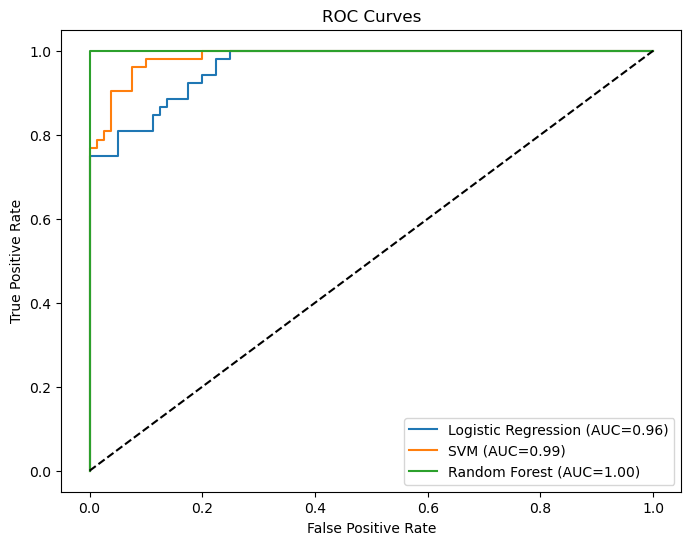

In [54]:
results = {}
plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1, 'ROC AUC': roc_auc}
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

Model Evaluation Metrics:
                      Accuracy  Precision    Recall        F1   ROC AUC
Logistic Regression  0.863636   0.814815  0.846154  0.830189  0.963702
SVM                  0.931818   0.938776  0.884615  0.910891  0.985577
Random Forest        1.000000   1.000000  1.000000  1.000000  1.000000

Best model by ROC AUC: Random Forest


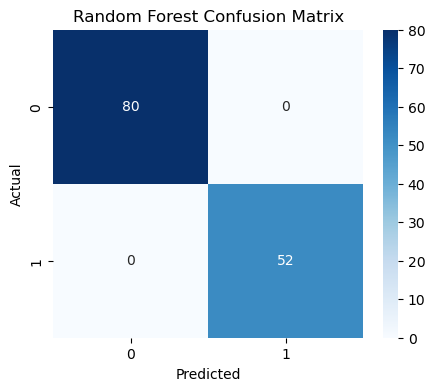

In [55]:
 #Display metrics
results_df = pd.DataFrame(results).T
print("Model Evaluation Metrics:\n", results_df)

# Best model by ROC AUC
best_model_name = results_df['ROC AUC'].idxmax()
best_model = models[best_model_name]
print(f"\nBest model by ROC AUC: {best_model_name}")

# Confusion matrix
y_best_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_best_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{best_model_name} Confusion Matrix")
plt.show()

In [56]:
# Feature importances for Random Forest
if best_model_name == 'Random Forest':
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
    print("\nRandom Forest Feature Importances:\n", feature_importance_df)


Random Forest Feature Importances:
                     Feature  Importance
0                       age    0.512744
1                    gender    0.242799
10                  obesity    0.043325
2               cholesterol    0.039635
3            blood_pressure    0.037521
9                  diabetes    0.028526
5                   smoking    0.023344
12              blood_sugar    0.016761
4                heart_rate    0.013830
6            alcohol_intake    0.007709
11             stress_level    0.007400
13  exercise_induced_angina    0.007268
7            exercise_hours    0.006961
14          chest_pain_type    0.006363
8            family_history    0.005814
